포트폴리오 이론 
     
삼성전자, SK하이닉스 의 주가 추세는 비슷하게 갈 것

삼성전자, 나이키는 그렇지 않을 것 위험 헷지 해보자

In [10]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

stocks=['AMD','AAPL','TSLA']

# df = fdr.DataReader("AAPL")
# df

df = pd.read_excel('실습 파일/fdr_AAPLstock.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 2024가 있지만 일단, 요거 고냥 1년치라고 하기
df = df[df.index.year>=2023]

In [15]:
# 전날 대비 변화량
change = df.pct_change()

# 252는 1년 기준 주말, 공휴일 다 제외하면
# 연간 평균 수익률
annual_change = change.mean()*252

# 공분산 : 변동성 (두 개의 특성을 비교해서 얼마만큼 차이가 있는지)
# 위험
cov = change.cov() # 위험률
annual_cov = cov*252
annual_cov

,AMD,AAPL,TSLA
AMD,0.236404,0.036350,0.076520
AAPL,0.036350,0.040407,0.043941
TSLA,0.076520,0.043941,0.272506


In [40]:
weights = np.random.random(len(stocks))
weights /= sum(weights)
weights

array([0.31921482, 0.25410415, 0.42668103])

- np.dot()
벡터 내적, 행렬곱 함수

In [43]:
# 1년 수익률
returns = np.dot(weights, annual_change)
returns

0.6717924292585907

In [51]:
# 포트폴리오 리스크 공식
# 포트폴리오 리스크 = sqrt(종목별비중.T * (종목별 연간 공분산) * 종목별 비중)
risk = np.dot(weights.T,np.dot(annual_cov, weights)) **(1/2)
risk

0.3355284899057453

##  3개의 주식을 어떤 비율로 구매하는 게 좋을까

In [70]:
# 전날 대비 변화량
change = df.pct_change()

# 252는 1년 기준 주말, 공휴일 다 제외하면
# 연간 평균 수익률
annual_change = change.mean()*252

# 공분산 : 변동성 (두 개의 특성을 비교해서 얼마만큼 차이가 있는지)
# 위험
cov = change.cov() # 위험률
annual_cov = cov*252
print(annual_cov)
print('-------------')
print(weights)
print('-------------')
print(np.dot(annual_cov, weights))
print('-------------')
print(weights.T)
print('-------------')
print(np.dot(weights.T, np.dot(annual_cov, weights))**(1/2))

total = []

# 위험도와 수익률 계산
# 계속 랜덤으로 시뮬레이션 돌리는 것
for n in range(100000):
    weights = np.random.random(len(stocks))
    weights/=sum(weights)
    
    returns = np.dot(weights, annual_change)
    risk = np.dot(weights.T, np.dot(annual_cov, weights))**(1/2)
    
    # sharp는 총 수익률(- 무 위험률? 일단 무시)/위험도
    # sharp지수가 클수록 좋은 것
    sharp_ratio= returns/risk
    
    total.append([returns, risk,sharp_ratio ,weights[0], weights[1], weights[2]])

           AMD      AAPL      TSLA
AMD   0.236404  0.036350  0.076520
AAPL  0.036350  0.040407  0.043941
TSLA  0.076520  0.043941  0.272506
-------------
[0.42452902 0.54196891 0.03350207]
-------------
[0.12262427 0.03880309 0.06542911]
-------------
[0.42452902 0.54196891 0.03350207]
-------------
0.2743713542793024


In [57]:
result = pd.DataFrame(total, columns=['수익률','위험률','샤프지수','AMD','AAPL','TSLA'])
result

,수익률,위험률,샤프지수,AMD,AAPL,TSLA
0,0.814768,0.337360,2.415126,0.604805,0.338312,0.056883
1,0.744615,0.355622,2.093838,0.404999,0.171736,0.423266
2,0.579678,0.313706,1.847842,0.212230,0.361492,0.426278
3,0.513724,0.308089,1.667451,0.129139,0.424763,0.446098
4,0.476463,0.325694,1.462915,0.064095,0.422514,0.513391
...,...,...,...,...,...,...
99995,0.812808,0.336885,2.412714,0.612064,0.360612,0.027324
99996,0.747879,0.327006,2.287050,0.458242,0.271727,0.270032
99997,0.687289,0.365169,1.882110,0.307188,0.173019,0.519792
99998,0.656420,0.319481,2.054644,0.316814,0.304462,0.378724


### 샤프지수가 가장 높은 비율

In [58]:
max_sharp = result[result['샤프지수']==result['샤프지수'].max()]
max_sharp

,수익률,위험률,샤프지수,AMD,AAPL,TSLA
32186,0.796886,0.329922,2.415378,0.583753,0.358564,0.057683


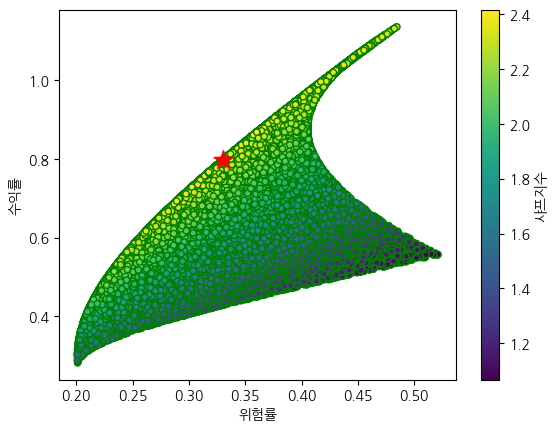

In [64]:
import koreanize_matplotlib
result.plot.scatter(x = '위험률',y='수익률',c='샤프지수',
                   edgecolor='g')

plt.scatter(x=max_sharp['위험률'],y = max_sharp['수익률'],
           c = 'r', marker='*', s=200)

plt.show()

### 위험률이 가장 낮은 비율

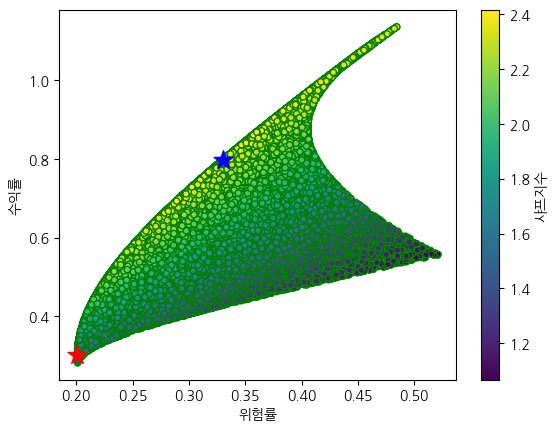

In [67]:
min_risk = result[result['위험률']==result['위험률'].min()]

import koreanize_matplotlib
result.plot.scatter(x = '위험률',y='수익률',c='샤프지수',
                   edgecolor='g')

plt.scatter(x=min_risk['위험률'],y = min_risk['수익률'],
           c = 'r', marker='*', s=200)

plt.scatter(x=max_sharp['위험률'],y = max_sharp['수익률'],
           c = 'b', marker='*', s=200)

plt.show()